# Installing Dependancies

In [141]:
import gpxpy
import gpxpy.gpx

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

from geopy.distance import distance
from geopy.distance import geodesic
from geopy import distance
import math

import haversine as hs
import numpy as np

import datetime



plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [142]:

with open('Routes/DD100K_2021.gpx', 'r') as gpx_file:
    DDgpx = gpxpy.parse(gpx_file)

In [143]:
DDgpx

GPX(tracks=[GPXTrack(name='Prince William County Trail Running', segments=[GPXTrackSegment(points=[...])])])

In [144]:
DDgpx.get_track_points_no()

59640

# Loading a GPX file

In [145]:
# Loading a GPX file
with open('Routes/2-loop_mtvernon.gpx', 'r') as gpx_file:
    loop2gpx = gpxpy.parse(gpx_file)

In [146]:

print(loop2gpx.get_track_points_no())
print(loop2gpx.get_elevation_extremes())
print(loop2gpx.get_uphill_downhill())
print('# of tracks - ',len(loop2gpx.tracks))
print('# of segments - ',len(loop2gpx.tracks[0].segments))

4304
MinimumMaximum(minimum=-27.200000762939453, maximum=28.399999618530273)
UphillDownhill(uphill=284.19998838156533, downhill=302.59998800009583)
# of tracks -  1
# of segments -  1


In [147]:
loop2gpx.tracks[0].segments[0].points[:4]

[GPXTrackPoint(38.79649353213608, -77.04552322626114, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 53, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(38.79648883827031, -77.04551886767149, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 54, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(38.796473080292344, -77.04550998285413, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 55, tzinfo=SimpleTZ("Z"))),
 GPXTrackPoint(38.79645690321922, -77.04550285823643, elevation=-3.0, time=datetime.datetime(2021, 11, 19, 14, 52, 56, tzinfo=SimpleTZ("Z")))]

In [148]:
# making a dictionary that can be converted to Pandas Dataframe
route_info=[]

for track in loop2gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            route_info.append({
                'time': point.time,
                'latitude': point.latitude,
                'longitude':point.longitude,
                'elevation': point.elevation
            })

route_info[:3]

[{'time': datetime.datetime(2021, 11, 19, 14, 52, 53, tzinfo=SimpleTZ("Z")),
  'latitude': 38.79649353213608,
  'longitude': -77.04552322626114,
  'elevation': -3.0},
 {'time': datetime.datetime(2021, 11, 19, 14, 52, 54, tzinfo=SimpleTZ("Z")),
  'latitude': 38.79648883827031,
  'longitude': -77.04551886767149,
  'elevation': -3.0},
 {'time': datetime.datetime(2021, 11, 19, 14, 52, 55, tzinfo=SimpleTZ("Z")),
  'latitude': 38.796473080292344,
  'longitude': -77.04550998285413,
  'elevation': -3.0}]

In [149]:
df = pd.DataFrame(route_info)
df.head()

,time,latitude,longitude,elevation
0,2021-11-19 14:52:53+00:00,38.796494,-77.045523,-3.0
1,2021-11-19 14:52:54+00:00,38.796489,-77.045519,-3.0
2,2021-11-19 14:52:55+00:00,38.796473,-77.045510,-3.0
3,2021-11-19 14:52:56+00:00,38.796457,-77.045503,-3.0
4,2021-11-19 14:52:57+00:00,38.796427,-77.045499,-2.8


# Create Simple BASE CSV file

In [150]:

df.to_csv('data/df.csv', index=False)

# Simple plots

## Plot the Route

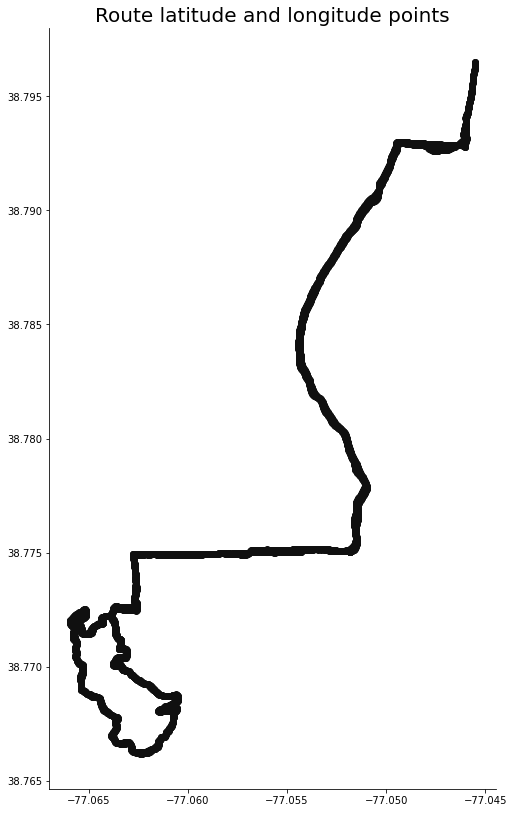

In [151]:
plt.figure(figsize=(8, 14))
plt.scatter(df['longitude'], df['latitude'], color='#101010')
plt.title('Route latitude and longitude points', size=20);

## Plot the Elevation

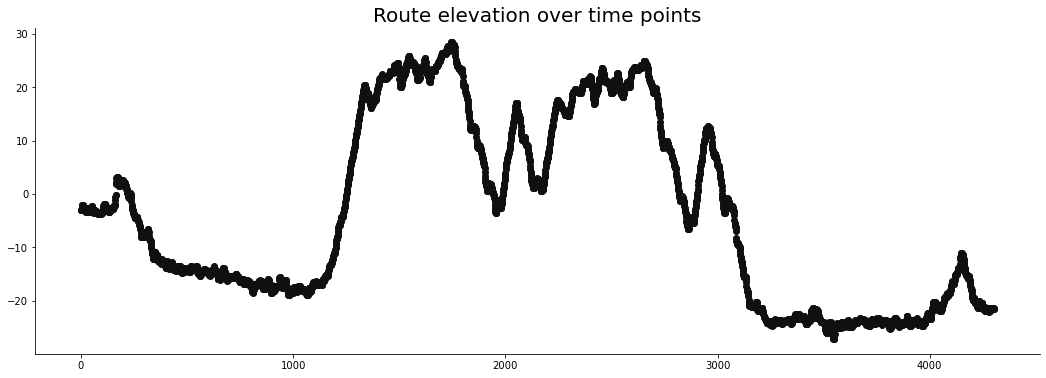

In [152]:
plt.figure(figsize=(18,6))
plt.scatter(df.index, df['elevation'], color='#101010')
plt.title('Route elevation over time points', size=20);

In [153]:
df.head()

,time,latitude,longitude,elevation
0,2021-11-19 14:52:53+00:00,38.796494,-77.045523,-3.0
1,2021-11-19 14:52:54+00:00,38.796489,-77.045519,-3.0
2,2021-11-19 14:52:55+00:00,38.796473,-77.045510,-3.0
3,2021-11-19 14:52:56+00:00,38.796457,-77.045503,-3.0
4,2021-11-19 14:52:57+00:00,38.796427,-77.045499,-2.8


In [154]:
pointxyz = []
for i in range(0,len(df)):
    pointxyz.append((df['latitude'][i], df['longitude'][i], df['elevation'][i]))

pointxyz[0]

(38.79649353213608, -77.04552322626114, -3.0)

In [155]:
df['pointxyz']= pd.Series(pointxyz)
df.head()

,time,latitude,longitude,elevation,pointxyz
0,2021-11-19 14:52:53+00:00,38.796494,-77.045523,-3.0,"(38.79649353213608, -77.04552322626114, -3.0)"
1,2021-11-19 14:52:54+00:00,38.796489,-77.045519,-3.0,"(38.79648883827031, -77.04551886767149, -3.0)"
2,2021-11-19 14:52:55+00:00,38.796473,-77.045510,-3.0,"(38.796473080292344, -77.04550998285413, -3.0)"
3,2021-11-19 14:52:56+00:00,38.796457,-77.045503,-3.0,"(38.79645690321922, -77.04550285823643, -3.0)"
4,2021-11-19 14:52:57+00:00,38.796427,-77.045499,-2.8,"(38.796427231281996, -77.04549883492291, -2.79..."


# Distance Calcs

## Geodesic

In [156]:
b_latlon = df['pointxyz'][1+1][:2]
a_latlon = df['pointxyz'][1][:2]
print(b_latlon,a_latlon)
print(geodesic(a_latlon,b_latlon).miles)

(38.796473080292344, -77.04550998285413) (38.79648883827031, -77.04551886767149)
0.0011880841825531274


In [157]:
# Get Step distance, i.e. distance between points.
euc_dist = [0]
# fl_dist =[0]

for i in range(len(df)-1):
    
    b_latlon = df['pointxyz'][i+1][:2]
    a_latlon = df['pointxyz'][i][:2]

    # OG elevation in meters (1000m = .6 miles)  so change meters into km and then convert to miles
    b_elv = df['pointxyz'][i+1][2]/1000*.6
    a_elv = df['pointxyz'][i][2]/1000*.6
    eldiff = b_elv-a_elv

    flat_distance =geodesic(a_latlon,b_latlon).miles
    # fl_dist.append(flat_distance)

    euc_distance = math.sqrt(flat_distance**2 + eldiff**2)
    euc_dist.append(euc_distance)

df['euc_dist'] = pd.Series(euc_dist)
# df['flat_dist'] = pd.Series(fl_dist)

df.head()


,time,latitude,longitude,elevation,pointxyz,euc_dist
0,2021-11-19 14:52:53+00:00,38.796494,-77.045523,-3.0,"(38.79649353213608, -77.04552322626114, -3.0)",0.000000
1,2021-11-19 14:52:54+00:00,38.796489,-77.045519,-3.0,"(38.79648883827031, -77.04551886767149, -3.0)",0.000400
2,2021-11-19 14:52:55+00:00,38.796473,-77.045510,-3.0,"(38.796473080292344, -77.04550998285413, -3.0)",0.001188
3,2021-11-19 14:52:56+00:00,38.796457,-77.045503,-3.0,"(38.79645690321922, -77.04550285823643, -3.0)",0.001180
4,2021-11-19 14:52:57+00:00,38.796427,-77.045499,-2.8,"(38.796427231281996, -77.04549883492291, -2.79...",0.002062


## Haversine

In [158]:
def haversine_distance(lat1, lon1, lat2, lon2) -> float:
    distance = hs.haversine(
        point1=(lat1,lon1),
        point2=(lat2,lon2),
        unit=hs.Unit.MILES
    )
    return np.round(distance,8)

In [159]:
haversine_distance(
    lat1=df.iloc[0]['latitude'],
    lon1=df.iloc[0]['longitude'],
    lat2=df.iloc[1]['latitude'],
    lon2=df.iloc[1]['longitude']
)

0.00040034

In [160]:
distances = [np.nan]

for i in range(len(df)):
    if i == 0:
        continue
    else:
        distances.append(haversine_distance(
            lat1=df.iloc[i - 1]['latitude'],
            lon1=df.iloc[i - 1]['longitude'],
            lat2=df.iloc[i]['latitude'],
            lon2=df.iloc[i]['longitude']
        ))

df['distance'] = distances
df.head()

,time,latitude,longitude,elevation,pointxyz,euc_dist,distance
0,2021-11-19 14:52:53+00:00,38.796494,-77.045523,-3.0,"(38.79649353213608, -77.04552322626114, -3.0)",0.000000,NaN
1,2021-11-19 14:52:54+00:00,38.796489,-77.045519,-3.0,"(38.79648883827031, -77.04551886767149, -3.0)",0.000400,0.000400
2,2021-11-19 14:52:55+00:00,38.796473,-77.045510,-3.0,"(38.796473080292344, -77.04550998285413, -3.0)",0.001188,0.001189
3,2021-11-19 14:52:56+00:00,38.796457,-77.045503,-3.0,"(38.79645690321922, -77.04550285823643, -3.0)",0.001180,0.001182
4,2021-11-19 14:52:57+00:00,38.796427,-77.045499,-2.8,"(38.796427231281996, -77.04549883492291, -2.79...",0.002062,0.002062


In [161]:
df['distance'].sum()

8.406340969999999

#### Speed Calc

In [162]:
# 1 sec is 1/60th of minute and a minute is 1/60th of an hour so 

euc_speed = []

for i in range(len(df)):
    euc_mph = df['euc_dist'][i]/(1/60/60)
    euc_speed.append(euc_mph)

df['euc_mph'] = pd.Series(euc_speed)



#### Elevation Change, Cum Elevation, and Cum Distance

In [163]:
df['elevation_change'] = df['elevation'].diff()
df['cum_elevation'] = df['elevation_change'].cumsum()
df['cum_distance'] = df['distance'].cumsum()
df = df.fillna(0)
df.head()


,time,latitude,longitude,elevation,pointxyz,euc_dist,distance,euc_mph,elevation_change,cum_elevation,cum_distance
0,2021-11-19 14:52:53+00:00,38.796494,-77.045523,-3.0,"(38.79649353213608, -77.04552322626114, -3.0)",0.000000,0.000000,0.000000,0.0,0.0,0.000000
1,2021-11-19 14:52:54+00:00,38.796489,-77.045519,-3.0,"(38.79648883827031, -77.04551886767149, -3.0)",0.000400,0.000400,1.440858,0.0,0.0,0.000400
2,2021-11-19 14:52:55+00:00,38.796473,-77.045510,-3.0,"(38.796473080292344, -77.04550998285413, -3.0)",0.001188,0.001189,4.277103,0.0,0.0,0.001590
3,2021-11-19 14:52:56+00:00,38.796457,-77.045503,-3.0,"(38.79645690321922, -77.04550285823643, -3.0)",0.001180,0.001182,4.249086,0.0,0.0,0.002771
4,2021-11-19 14:52:57+00:00,38.796427,-77.045499,-2.8,"(38.796427231281996, -77.04549883492291, -2.79...",0.002062,0.002062,7.422258,0.2,0.2,0.004833


In [164]:
# rnage of elevation 
df.describe()

,latitude,longitude,elevation,euc_dist,distance,euc_mph,elevation_change,cum_elevation,cum_distance
count,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000,4304.000000
mean,38.776891,-77.057857,-3.665892,0.001958,0.001953,7.050208,-0.004275,-0.665892,4.215165
std,0.008550,0.006189,17.281843,0.000503,0.000505,1.809371,0.222090,17.281843,2.329235
min,38.766160,-77.065959,-27.200001,0.000000,0.000000,0.000000,-1.200000,-24.200001,0.000000
25%,38.770136,-77.063445,-18.600000,0.001687,0.001679,6.073177,-0.199999,-15.600000,2.355975
50%,38.774916,-77.060646,-6.600000,0.002035,0.002029,7.324486,0.000000,-3.600000,4.206025
75%,38.782989,-77.052164,12.800000,0.002244,0.002239,8.077030,0.199999,15.800000,6.135807
max,38.796494,-77.045499,28.400000,0.010075,0.010084,36.270216,2.000000,31.400000,8.406341


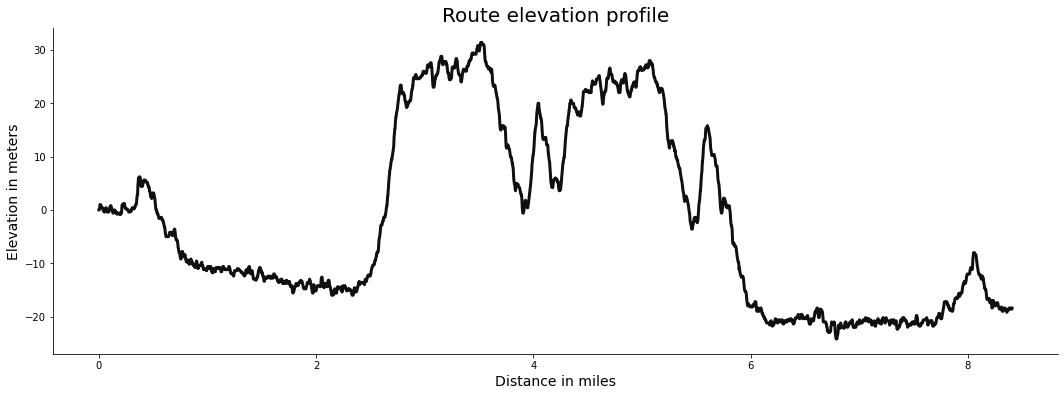

In [165]:
plt.figure(figsize=(18,6))
plt.plot(df['cum_distance'], df['cum_elevation'], color='#101010', lw=3)
plt.title('Route elevation profile', size=20)
plt.xlabel('Distance in miles', size=14)
plt.ylabel('Elevation in meters', size=14);

In [166]:
df['5sec_rolling_elv'] = df['elevation_change'].rolling(5).mean()
df['second'] = df.index
df[10:15]

,time,latitude,longitude,elevation,pointxyz,euc_dist,distance,euc_mph,elevation_change,cum_elevation,cum_distance,5sec_rolling_elv,second
10,2021-11-19 14:53:03+00:00,38.796248,-77.045531,-2.2,"(38.79624827764928, -77.04553068615496, -2.200...",0.002283,0.002283,8.219338,-0.2,0.8,0.017339,0.04,10
11,2021-11-19 14:53:04+00:00,38.796213,-77.045538,-2.4,"(38.79621349275112, -77.04553806222975, -2.400...",0.002435,0.002436,8.766764,-0.2,0.6,0.019775,-0.08,11
12,2021-11-19 14:53:05+00:00,38.796177,-77.045542,-2.4,"(38.79617736674845, -77.0455424208194, -2.4000...",0.002503,0.002507,9.010918,0.0,0.6,0.022282,-0.08,12
13,2021-11-19 14:53:06+00:00,38.796144,-77.045550,-2.6,"(38.79614409059286, -77.04554996453226, -2.599...",0.002334,0.002335,8.403474,-0.2,0.4,0.024617,-0.12,13
14,2021-11-19 14:53:07+00:00,38.796116,-77.045559,-2.6,"(38.79611584357917, -77.04555943608284, -2.599...",0.002014,0.002017,7.251940,0.0,0.4,0.026634,-0.12,14


In [167]:
el_change_distribution = pd.Series(df['elevation_change']).copy()
# el_change_distribution.sort()

In [168]:
# n_bins = 20

# # Generate two normal distributions
# dist1 = el_change_distribution

# mu = dist1.mean()[0]  # mean of distribution
# sigma = dist1.std()[0]  # standard deviation of distribution

# fig, ax = plt.subplots()

# # We can set the number of bins with the *bins* keyword argument.
# n, bins, patches = ax.hist(dist1, bins=n_bins, density=True)

# # # add a 'best fit' line
# y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
#      np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

# ax.plot(bins, y, '--')
# ax.set_xlabel('Elevation Change')
# ax.set_ylabel('Probability density')
# ax.set_title(r'Histogram of Elevation Change: $\mu=.0043$, $\sigma=.222$')

# # # # Tweak spacing to prevent clipping of ylabel
# fig.tight_layout()
# plt.show()

In [169]:
# seconds to time
def sec_2_time(seconds):
    str_time = str(datetime.timedelta(seconds=seconds))
    return str_time
sec_2_time(3905)

'1:05:05'

In [170]:
# Adding Elapsed Time
def elapsed_time(row):
    time = str(datetime.timedelta(seconds=row['second']))
    return time

df['elapsed_time']= df.apply(elapsed_time, axis=1)

# Adding steps/distance in feet
df['step_feet'] = df['euc_dist'] * 5280
df.head()

# Adding mile identifiers


df.head()

,time,latitude,longitude,elevation,pointxyz,euc_dist,distance,euc_mph,elevation_change,cum_elevation,cum_distance,5sec_rolling_elv,second,elapsed_time,step_feet
0,2021-11-19 14:52:53+00:00,38.796494,-77.045523,-3.0,"(38.79649353213608, -77.04552322626114, -3.0)",0.000000,0.000000,0.000000,0.0,0.0,0.000000,NaN,0,0:00:00,0.000000
1,2021-11-19 14:52:54+00:00,38.796489,-77.045519,-3.0,"(38.79648883827031, -77.04551886767149, -3.0)",0.000400,0.000400,1.440858,0.0,0.0,0.000400,NaN,1,0:00:01,2.113258
2,2021-11-19 14:52:55+00:00,38.796473,-77.045510,-3.0,"(38.796473080292344, -77.04550998285413, -3.0)",0.001188,0.001189,4.277103,0.0,0.0,0.001590,NaN,2,0:00:02,6.273084
3,2021-11-19 14:52:56+00:00,38.796457,-77.045503,-3.0,"(38.79645690321922, -77.04550285823643, -3.0)",0.001180,0.001182,4.249086,0.0,0.0,0.002771,NaN,3,0:00:03,6.231993
4,2021-11-19 14:52:57+00:00,38.796427,-77.045499,-2.8,"(38.796427231281996, -77.04549883492291, -2.79...",0.002062,0.002062,7.422258,0.2,0.2,0.004833,0.04,4,0:00:04,10.885979


In [171]:
# Identify times when runner is stopped or moving very slowly
def find_stops(row):
    if row['euc_mph'] < 1:
        return 0
    return 1

df['moving_time'] = df.apply(find_stops, axis=1)

In [172]:
df.tail()


,time,latitude,longitude,elevation,pointxyz,euc_dist,distance,euc_mph,elevation_change,cum_elevation,cum_distance,5sec_rolling_elv,second,elapsed_time,step_feet,moving_time
4299,2021-11-19 16:04:32+00:00,38.795236,-77.045685,-21.6,"(38.7952355761081, -77.04568499699235, -21.600...",0.002134,0.002137,7.682124,0.000000,-18.6,8.398387,-0.04,4299,1:11:39,11.267115,1
4300,2021-11-19 16:04:33+00:00,38.795267,-77.045679,-21.6,"(38.79526692442596, -77.04567896202207, -21.60...",0.002187,0.002190,7.872447,0.000000,-18.6,8.400577,0.00,4300,1:11:40,11.546256,1
4301,2021-11-19 16:04:34+00:00,38.795301,-77.045674,-21.6,"(38.79530120640993, -77.04567359760404, -21.60...",0.002382,0.002386,8.576695,0.000000,-18.6,8.402964,0.00,4301,1:11:41,12.579153,1
4302,2021-11-19 16:04:35+00:00,38.795327,-77.045666,-21.6,"(38.79532660357654, -77.04566630534828, -21.60...",0.001796,0.001798,6.464028,0.000000,-18.6,8.404762,0.00,4302,1:11:42,9.480575,1
4303,2021-11-19 16:04:36+00:00,38.795349,-77.045664,-21.4,"(38.79534940235317, -77.04566420987248, -21.39...",0.001581,0.001579,5.692567,0.200001,-18.4,8.406341,0.04,4303,1:11:43,8.349099,1


In [173]:
df['euc_dist'].sum()

8.428915447615363

In [174]:
from time import strftime
from time import gmtime

strftime("%H:%M:%S", gmtime(3905))
'00:11:06'

'00:11:06'

In [175]:
# levels of elevation change
# flat = 0
# slight up = 
# slight down <
# steep up > 0.5
# steep down < 0.5
labels = ['SteepD','SlightD','Flat','SlightU','SteepU']
custom_cut =[-100, -0.5, -0.25, 0.25, 0.5, 100]

#  do it over a set length of distance... not every step.

In [132]:
df.to_csv('data/df_add.csv', index=False)